TASK 1: TITANIC SURVIVAL PREDICTION

    Author: Yogesh Baghel
    
    Domain: Data Science
    
    Name: Bobade Adedamola Timilehin
    
    Batch: June batch A56
    
    Aim: To build a model that predicts whether a passanger on the Titanic survived or not  
    
Task:TITANIC SURVIVAL PREDICTION

        1. Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data
        2. The dataset typically used for this project contains information about individual passengers, such as their age, ticket class, fare, cabin, and whether or not they survived.
        
Data Description

        Pclass: Aproxy for socio-economic status
        1st=Upper
        2nd=Middle
        3rd=Lower
        Sibsp: The dataset defines family relations in this way...
        siblings=brother, sister, stepbrother,stepsister
        spouse=Husband, wife(mistress and fiancies were ignored)
        Parch:  The dataset defines family relation in this way...
        parent=mother, father
        child=daughter, son, stepdaughter, stepson. Some children travelled only with a nanny therefore Parch=0 for them.

In [6]:
#IMPORTING IMPORTANT LIBRARIES

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#IMPORTING THE DATASET

In [25]:
df = pd.read_csv('Titanic-Dataset.csv')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
#view 10 rows

In [28]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
#number of rows and columns
df.shape

(891, 12)

In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
#checking the number of missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
#Age,Cabin and Embarked has Null values 

In [34]:
#filling the blank with median value
df['Age'].fillna(df['Age'].median(), inplace=True)

In [35]:
#Counting the Embarked
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
#replace blanks with mode value
df['Embarked'].fillna('S', inplace=True)

In [37]:
#instead of counting the Embarked cloumn we can find the mode value in the column
print(df['Embarked'].mode())

0    S
dtype: object


In [38]:
print(df['Embarked'].mode()[0])

S


In [39]:
#we can also fill the blanks space like this
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [40]:
#null value in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [41]:
#removing cabin column because it contains a significant number of missing values.or df.drop(columns="cabin", axis=1)
df.drop(columns="Cabin", inplace=True)

In [42]:
#Checking if there is Null value 
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [ ]:
Dataset is Cleaned

Exploratory Data Analysis 
i described survival variable as
0=NO, 1=YES


In [19]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#Data visualization

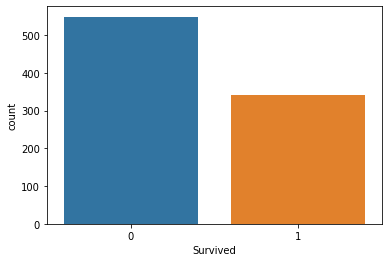

In [20]:
sns.countplot(data=df, x='Survived')

In [ ]:
Pclass column is described as:
    1st= Upper
    2nd= Middle
    3rd= Lower

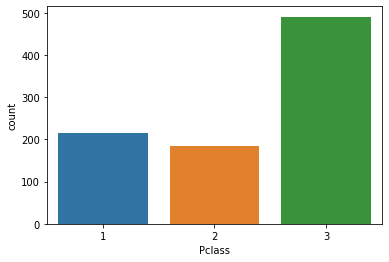

In [21]:
sns.countplot(data=df, x='Pclass')

In [22]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

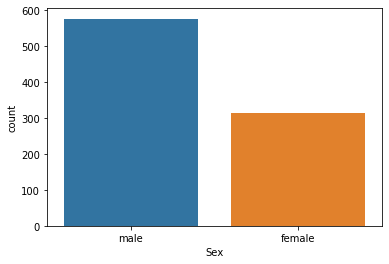

In [23]:
sns.countplot(data=df, x='Sex')

In [24]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
import seaborn as sns

In [26]:
import seaborn as sns
print(sns.__version__)

0.10.0


In [27]:
import matplotlib.pyplot as plt

In [ ]:
#Showing count of survival wrt Pclass

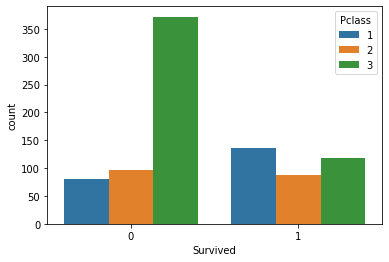

In [46]:
#Survival wrt to Ticket class
sns.countplot(df['Survived'], hue=df['Pclass'])

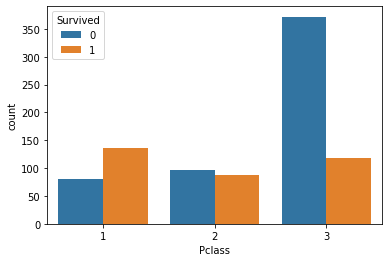

In [47]:
#Ticket class wrt to Survived
sns.countplot(df['Pclass'], hue=df['Survived'])

In [48]:
df['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

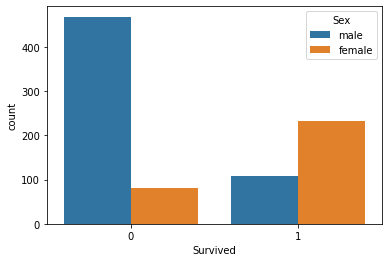

In [49]:
sns.countplot(x=df['Survived'], hue=df['Sex'])

In [ ]:
# coverting categorical columns
df.replace(('Sex':('male':1, 'female':0), 'Embarked':('S':0,'C':1,'Q':2)), inplace=True)

In [ ]:
modeling the data
transforming gender(Sex) into numeric
male=1
female=0
using encoder from sklearn library

In [52]:
from sklearn.preprocessing import LabelEncoder
Labelencoder =LabelEncoder()
df['Sex']= Labelencoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


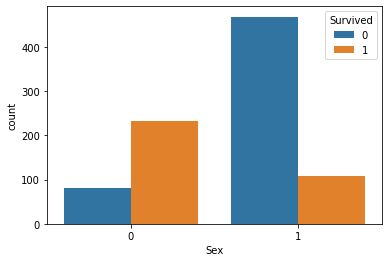

In [53]:
sns.countplot(x=df['Sex'], hue=df['Survived'])
plt.show()

In [54]:
df.drop(columns=["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Fare", "Age", "Embarked"], inplace=True)

In [55]:
df.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [ ]:
#Modelling

In [56]:
x=df[['Sex', 'Pclass']]
y=df['Survived']

In [57]:
#spliting data into test and train by using sklearn library

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [59]:
print("x_train shape:", x_train.shape)

x_train shape: (712, 2)


In [64]:
x_train.head()

,Sex,Pclass
140,0,3
439,1,2
817,1,2
378,1,3
491,1,3


In [60]:
print("x_test shape:", x_test.shape)

x_test shape: (179, 2)


In [61]:
print("y_train shape:", y_train.shape)

y_train shape: (712,)


In [62]:
print("y_test shape:", y_test.shape)

y_test shape: (179,)


In [63]:
print(x.shape, x_train.shape, x_test.shape)

(891, 2) (712, 2) (179, 2)


In [ ]:
#creating training model

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [68]:
#Instantiate the  Prediction(LogisticRegression) model

In [69]:
#fitting the model on the training data

In [70]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [71]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [72]:
print(x_train[:5])

     Sex  Pclass
140    0       3
439    1       2
817    1       2
378    1       3
491    1       3


In [93]:
print(x_train)

     Sex  Pclass
140    0       3
439    1       2
817    1       2
378    1       3
491    1       3
..   ...     ...
835    0       1
192    0       3
629    1       3
559    0       3
684    1       2

[712 rows x 2 columns]


In [73]:
print(y_train[:5])

140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64


In [74]:
#Convert y_train to a NumPy array since is a 'pandas.Series'

In [75]:
y_train = y_train.values

In [76]:
print(y_train)

[0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 0 

In [77]:
#Instantiate the  Prediction(LogisticRegression) model

In [78]:
model = LogisticRegression()

In [79]:
#fitting the model on the training data

In [80]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
#Model Evaluation

In [82]:
y_pred=model.predict(x_test)

In [83]:
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [84]:
print("Accuracy_score:", accuracy_score(y_test, y_pred))

Accuracy_score: 0.7877094972067039


In [85]:
print("Matrix:", confusion_matrix(y_test, y_pred))

Matrix: [[92 18]
 [20 49]]


In [86]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

In [87]:
submission=x.iloc[:,:].values
y_final=model.predict(submission)

In [88]:
y_final.shape

(891,)

In [89]:
final = pd.DataFrame()
final["Sex"]=x['Sex']
final["Survived"] =y_final

In [90]:
final.to_csv("submission.csv",index=False)

In [91]:
#PREDICT([[PCLASS, SEX]]) IF SURVIVED OR NOT

In [92]:
import warnings
warnings.filterwarnings('ignore')
result=model.predict([[3, 1]])
if result == 0:
    print("so sorry, No Survival")
else:
    print("Survived")

so sorry, No Survival
